In [24]:
%logstop
%logstart -rtq ~/.logs/ML_Intro_ML.py append
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Intro to Machine Learning

What does it mean to learn?  Learning is a process where we take a series of observations and draw conclusions based on past experiences.  For example, we can learn to recognize patterns in experiential data such as when I take the later bus, I'm late to work.  Machine Learning is when we teach a computer to do the same thing, namely find patterns in data.  The idea is that humans are really great at finding patterns, but relatively slow at looking through large amounts of data.  Computers need to be trained to find the patterns, but they can process data of the sort of we have (csv files, images, etc) incredibly fast.

The revolution of Machine Learning has its roots in two main factors

1. A massive amount of newly generated data
2. A massive improvement in computer memory and performance

If we want to leverage machine learning, we need to learn to teach computers to recognize patterns and leverage that ability to solve real world patterns.  Lets start with a really simple example.

Say we have one dimensional data given by a single feature $X$ and a corresponding set of labels $y$.  We want to model this data, so we will create a relationship $f(X) \approx y$.  This function $f$ will represent our model.  We will generate the data here by randomly choosing an exponent for a trend and adding some random noise.  Let's create the data and see what this looks like.

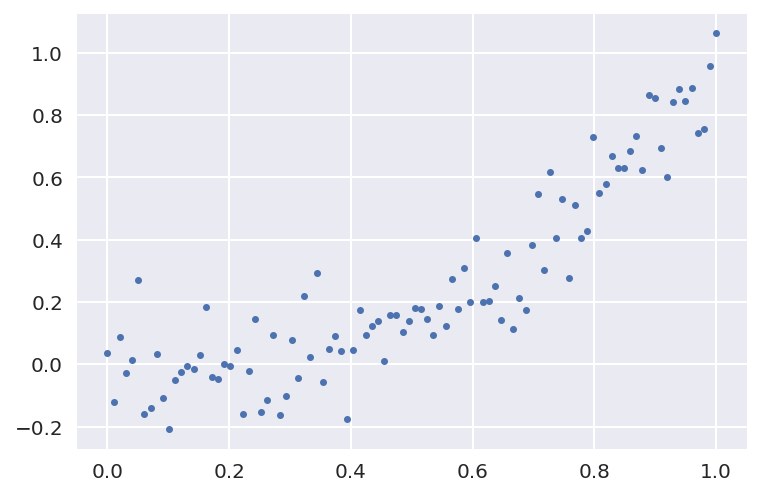

In [4]:
X = np.linspace(0, 1, 100)
exp = np.random.choice([2, 3])
y = X**exp + np.random.randn(X.shape[0])/10
plt.plot(X, y, '.');

We will now generate the predictive relationship by using one of the simplest possible methods, fitting a line to the data

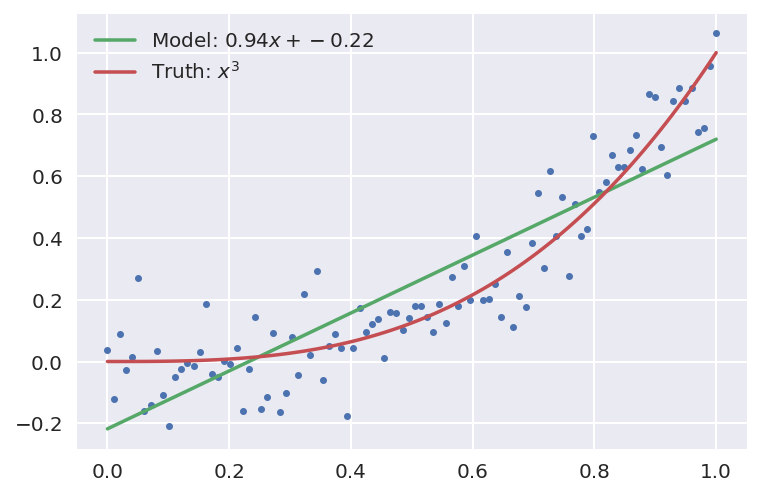

In [5]:
p = np.polyfit(X, y, 1)
z = np.poly1d(p)
plt.plot(X, y, '.')
plt.plot(X, z(X), label=r"Model: ${:.2f}x + {:.2f}$".format(*p))
plt.plot(X, X**exp, label=r'Truth: $x^{}$'.format(exp))
plt.legend();

We now have a model for this data, learned by the computer, namely given an $X$ value (or a bunch of values), we can predict the output.  In the context of Machine Learning, this is called a Linear Regression and is a quite powerful and general method to learn.  Just this example opens up many questions we will be answering in later lectures:

1. How good is the model?
2. Can we add flexibility to the model?
3. Is the model generalizable?
4. What does this model teach us about the data?

Lets start with question 4, which in many ways is the most important question.  For this simple model we can see that the $y$ vector of labels has a positive correlation with the features $X$. 

Normally the goal of machine learning is two-fold

1. To understand the data we already have
2. Use this understand to make predictions about unlabeled data

Machine Learning falls into two classes, **supervised** learning and **unsupervised** learning.  In supervised learning we are trying to learn a predictive relationship between **features** of our data and some sort of output label. In unsupervised learning we want to find trends in our features without using any target labels. Unsupervised learning typically relies on reducing the dimensionality of the data.  

A human example of supervised learning would be borrowing books from a library on mathematics and geography. By reading different books belonging to each topic, we learn what symbols, images, and words are associated with math, and which are associated with geography. A similar unsupervised task would be to borrow many books without knowing their subject. We can see some books contain similar images (maps) and some books contain similar symbols (e.g. the Greek letters $\Sigma$ and $\pi$). We say the books containing maps are similar and that they are different from the books containing Greek letters. Crucially, _we do not know what the books are about, only that they are similar or different_.

Lets first talk about supervised learning as that is where we will spend most of our time.

Formally, the supervised machine problem can be stated as given a matrix $X$, of dimensions $n \times p$, create a predictive relationship (or function) $f(X)$ where $f(X) \approx y$, where $y$ is a vector of dimension $n$.  $X$ is referred to as the **feature matrix** and $y$ as the **labels**.

The general goal of supervised learning is to then apply this model to unlabeled data where can build a feature matrix representative of the original.  This allows us to make predictions! 

Of course, machine learning is just a tool, one which must be applied with care and thought.  It is not the ideal solution to every problem.  Let us take a look at some of the issues we might find.

## Machine Learning Difficulties

Models can be heavily biased and thus not flexible enough to handle generalization.  Let us plot our original function over a larger range and use the model from before.

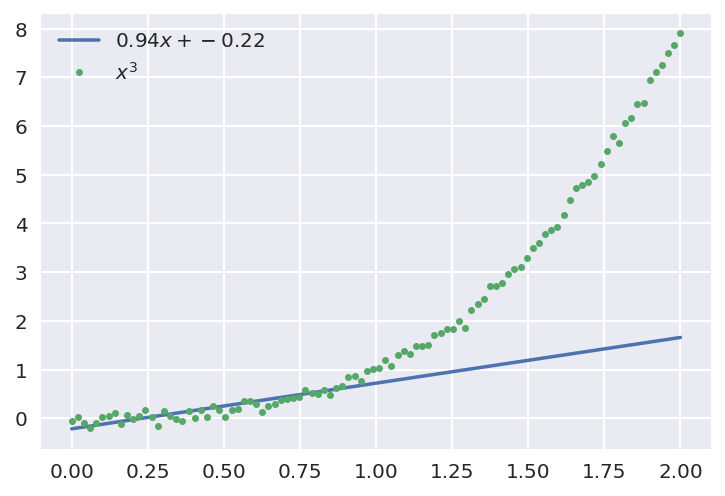

In [6]:
X = np.linspace(0, 2, 100)
y = X**exp + np.random.randn(X.shape[0])/10
plt.plot(X, z(X), label=r"${:.2f}x + {:.2f}$".format(*p))
plt.plot(X, y,'.', label=r'$x^{}$'.format(exp))
plt.legend();

The model works fairly well for the range over which initially considered our data, but we can see it will not generalize well to features outside the of the range we considered.  This is a general problem; we should be careful that our training data contains a well sampled distribution over which we expect to make predictions (or we have some prior knowledge that tells us we should be able to extrapolate beyond the domain of our training data).  Machine learning finds patterns in data that it's already seen, and it can't always make good predictions on data it hasn't. 

Lets try to fix this by adding more parameters to the model.

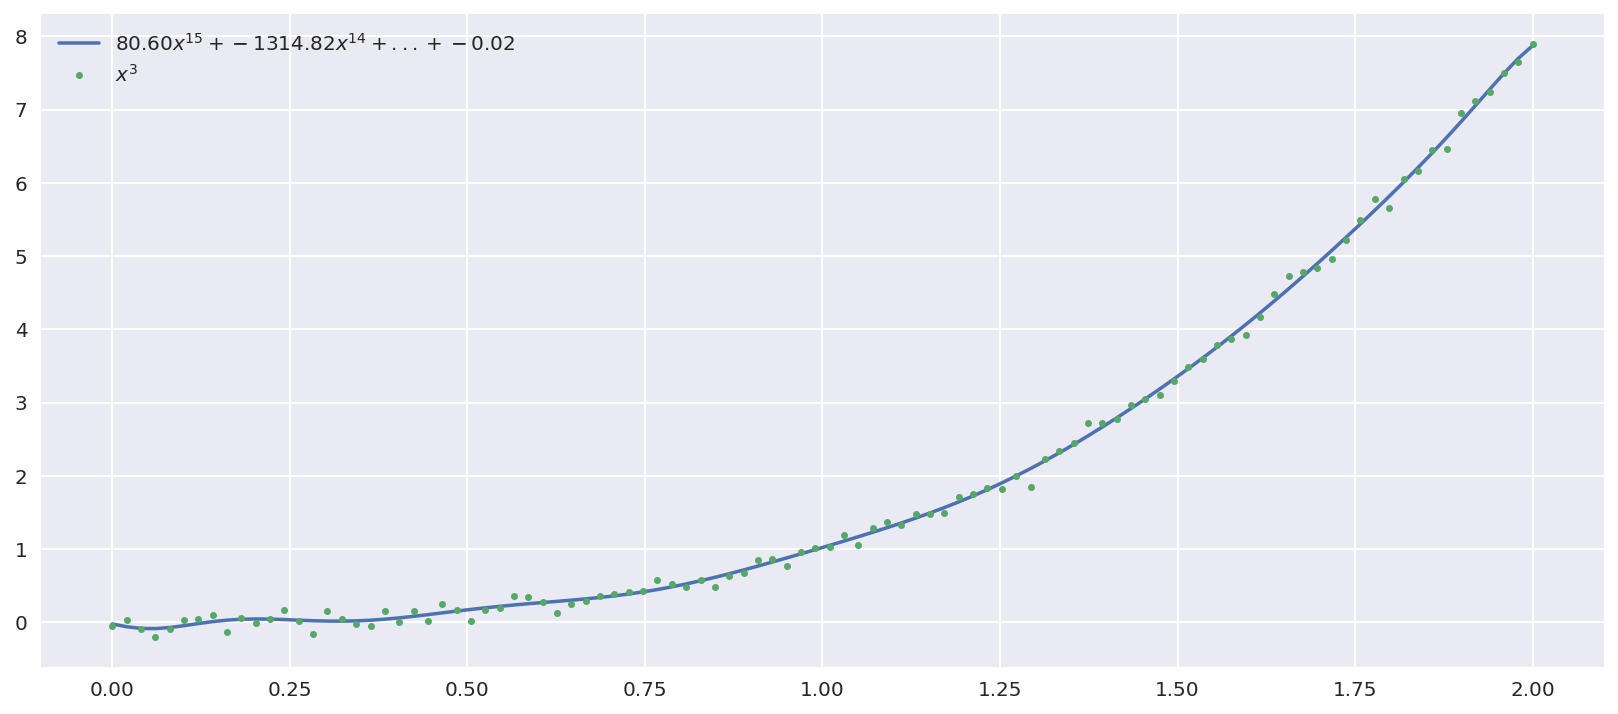

In [7]:
p = np.polyfit(X, y, 15)
z = np.poly1d(p)
plt.figure(figsize=[14, 6])
plt.plot(X, z(X), label=r"${:.2f}x^{{15}} + {:.2f}x^{{14}} + ... + {:.2f}$".format(*p[[0, 1, -1]]))
plt.plot(X, y,'.', label=r'$x^{}$'.format(exp))
plt.legend();

Wow looks like a perfect fit!  Maybe too good?  It looks like the model is fitting little wiggles in the data which we know are not real (the actual data is derived from a simple exponent).  Lets try to generalize again.

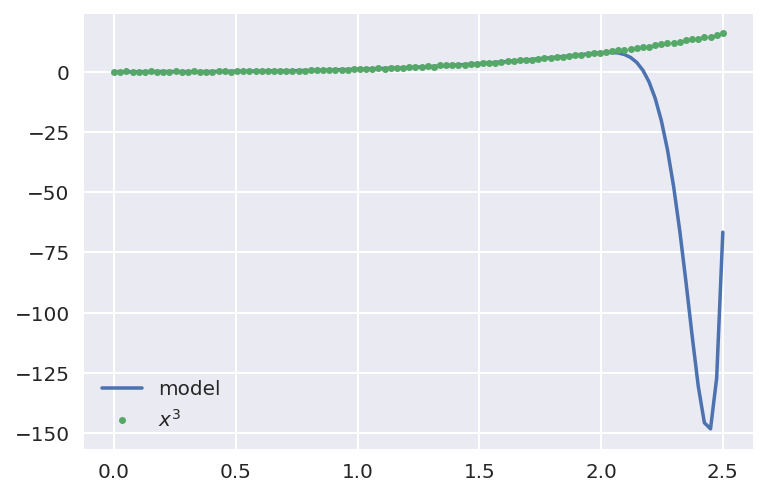

In [8]:
X = np.linspace(0, 2.5, 100)
y = X**exp + np.random.randn(X.shape[0])/10
plt.plot(X, z(X), label=r"model")
plt.plot(X, y,'.', label=r'$x^{}$'.format(exp))
plt.legend();

Wow again!  That is pretty bad.  This is an example of overfitting, where we have allowed the model too much flexibility and it has fit the noise in the data which is not generalizable.

We will learn more how to combat these issues, but the point is that we need to be careful when choose the model we want to use and the **hyperparameters** (in this case, order of the polynomial) for the model.

## Scikit-Learn

In order to perform machine learning we will make use of the `scikit-learn` package will offer a unified class based interface to different machine learning models and utilities.  `Scikit-learn` is based around the idea of an `Estimator` class which implements the methods necessary for machine learning.  

Each estimator object will implement a `fit` method which accepts as arguments a feature matrix `X` and a label vector `y` as well as a `predict` method which accepts a an argument a feature matrix `X`.  Lets go through an example.  

First we will need to import the estimator we want, in this case a `LinearRegression` (we only have to do this once per namespace, it's just a Python class).

In [9]:
from sklearn.linear_model import LinearRegression

Now we can instantiate an instance of this class and pass any hyperparameters into the creation.  The [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) has two main hyperparameters, `fit_intercept` and `normalize`.  These have default values, but we will specify them here explicitly.

In [10]:
lr = LinearRegression(fit_intercept=True, normalize=False)
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now we can use this object to fit our data from before.  We will use the `fit` method to do this.  We will need to reshape the `X` vector so that its a feature matrix of a single column instead of a one dimensional vector.

In [11]:
lr.fit(X.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The `fit` method will perform the fit and save the fitted parameters internal to the state of the object.  We can see them if we wish.

In [12]:
lr.coef_, lr.intercept_

(array([5.63968423]), -3.1012923458254873)

Saving the parameters inside the instance is extremely useful as it allows us to pickle the entire object and save the parameters inside the model itself.  

Lastly we can use the `predict` method to make predictions. 

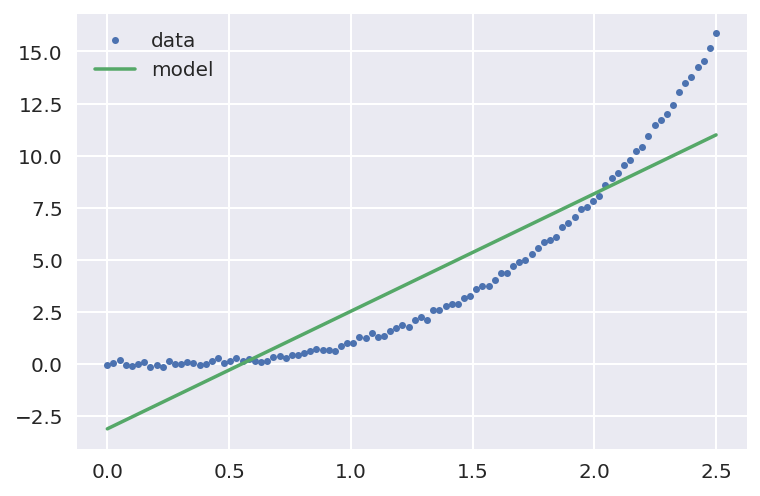

In [13]:
predictions = lr.predict(X.reshape(-1, 1))
plt.plot(X, y, '.', label='data')
plt.plot(X, predictions, label='model')
plt.legend();

We will explore linear models in more detail in a later lecture, but if we want to make this model better, we will need to engineer some better features.  To get a sneak peak of where we are going, lets deploy some more `scikit-learn` machinery.

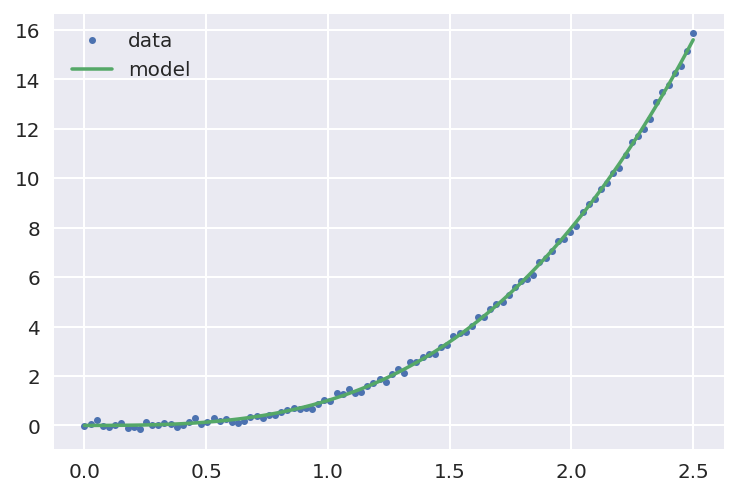

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ('polynomial_transform', PolynomialFeatures(3)),
    ('linear_fit', LinearRegression())
])

pipe.fit(X.reshape(-1, 1), y)

predictions = pipe.predict(X.reshape(-1, 1))
plt.plot(X, y, '.', label='data')
plt.plot(X, predictions, label='model')
plt.legend();

Does this generalize?

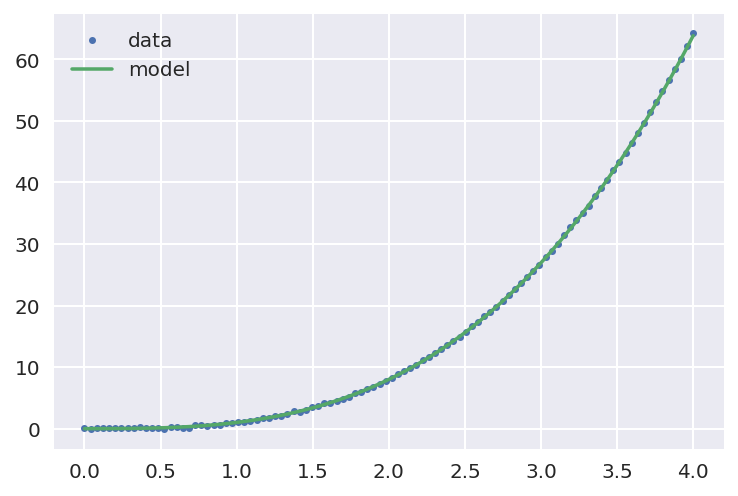

In [15]:
X = np.linspace(0, 4, 100)
y = X**exp + np.random.randn(X.shape[0])/10
predictions = pipe.predict(X.reshape(-1, 1))
plt.plot(X, y, '.', label='data')
plt.plot(X, predictions, label='model')
plt.legend();

*Copyright &copy; 2020 The Data Incubator.  All rights reserved.*